In [ ]:
import sys
!{sys.executable} -m pip install mycolorpy

In [1]:
from models import Entity, Environment
from vizuals import plot_env_history

import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt
import time

from random import uniform

TRAIN_SIZE = 200
LIMS = (-3, 3)
VAL_LIMS = (3, 4)

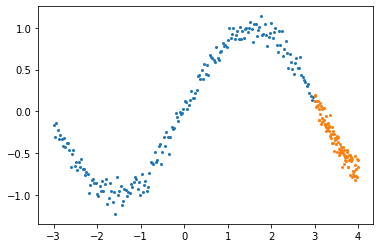

In [7]:
x_arr = torch.linspace(*LIMS, TRAIN_SIZE)
y_arr = torch.sin(x_arr) + torch.normal(0, 0.08, size=(TRAIN_SIZE,))
dataset = Data.TensorDataset(x_arr.unsqueeze(1),y_arr.unsqueeze(1))
train_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=10, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

x_val = torch.linspace(*VAL_LIMS, 100)
y_val = torch.sin(x_val) + torch.normal(0, 0.08, size=(100,))
dataset = Data.TensorDataset(x_val.unsqueeze(1), y_val.unsqueeze(1))
val_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2)
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2)

In [8]:
env = Environment(8, train_loader, train_epochs=50, validation_loader=val_loader)

cpu


In [9]:
start_time = time.time()
env.train_epoch()
print(f"Train ended in {int(time.time() - start_time)} s")
env.validate_entities()

Train ended in 14 s


[0.2119214928150177,
 0.28134054839611056,
 0.2982019066810608,
 0.20782251596450804,
 0.10014665886759758,
 0.19917400300502777,
 0.3635104298591614,
 0.27537760615348816]

8 ['#0000ff', '#0024ed', '#0049db', '#006dc8', '#0092b6', '#00b6a4', '#00db92', '#00ff80']
[1] [0.2119214928150177] 0
[1] [0.28134054839611056] 1
[1] [0.2982019066810608] 2
[1] [0.20782251596450804] 3
[1] [0.10014665886759758] 4
[1] [0.19917400300502777] 5
[1] [0.3635104298591614] 6
[1] [0.27537760615348816] 7


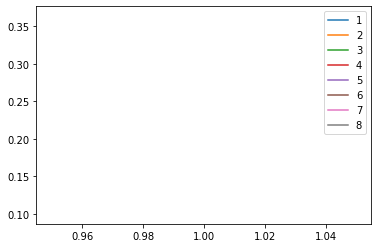

In [10]:
plot_env_history(env)

In [11]:
for i in range(10):
    start_time = time.time()
    env.evo_step()
    env.train_epoch()
    env.validate_entities()
    print(f"Evo epoch {i+1} ended in {int(time.time() - start_time)} s")

0.10014665886759758 4
0.19917400300502777 5
0.20782251596450804 3
0.2119214928150177 0
0.27537760615348816 7
Evo epoch 1 ended in 14 s
0.07519003450870514 4
0.11850194662809373 4
0.18907333076000216 3
0.21106026768684388 0
0.22312621593475343 5
Evo epoch 2 ended in 13 s
0.14376879453659058 4
0.16364160299301148 4
0.19743769049644472 0
0.22709421515464784 3
0.2285783815383911 4
Evo epoch 3 ended in 13 s
0.07740746855735778 4
0.1205255964398384 4
0.1796400147676468 4
0.21893961131572723 4
0.21988496065139768 4
Evo epoch 4 ended in 13 s
0.07393059298396111 4
0.08042707696557046 4
0.13122547626495362 4
0.13607317984104156 4
0.1541863489151001 4
Evo epoch 5 ended in 14 s
0.06938275843858718 4
0.06997720628976822 4
0.07393059059977532 4
0.07393059194087982 4
0.08259777262806892 4
Evo epoch 6 ended in 15 s
0.04252133399248123 4
0.07314971074461937 4
0.07393059119582177 4
0.07393059223890305 4
0.07506056591868401 4
Evo epoch 7 ended in 14 s
0.020714989490807058 4
0.027198981195688247 4
0.06971

8 ['#0000ff', '#0024ed', '#0049db', '#006dc8', '#0092b6', '#00b6a4', '#00db92', '#00ff80']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] [0.10014665886759758, 0.11850194662809373, 0.16364160299301148, 0.21988496065139768, 0.1541863489151001, 0.06938275843858718, 0.04252133399248123, 0.0697182223200798, 0.02356394834816456, 0.013432122580707074, 0.02198144793510437] 4
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] [0.10014665886759758, 0.11850194662809373, 0.16364160299301148, 0.21988496065139768, 0.1541863489151001, 0.06938275843858718, 0.04252133399248123, 0.020714989490807058, 0.023861969262361525, 0.031017962768673895, 0.03866030618548393] 4
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] [0.10014665886759758, 0.11850194662809373, 0.16364160299301148, 0.21988496065139768, 0.1541863489151001, 0.06938275843858718, 0.07506056591868401, 0.027198981195688247, 0.024910522922873497, 0.033882516771554946, 0.087313474714756] 4
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] [0.10014665886759758, 0.11850194662809373, 0.16364160299301148

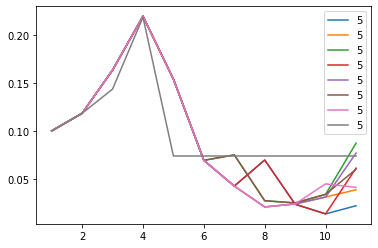

In [12]:
plot_env_history(env)

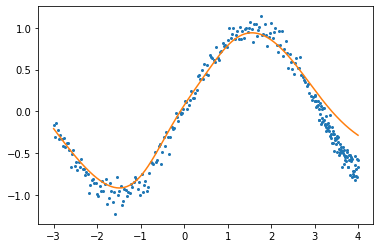

In [20]:
plt.plot(torch.cat((x_arr, x_val)), torch.cat((y_arr, y_val)), marker="o", lw=0, markersize=2)
y_p = env.entities[5].predict(torch.cat((x_arr, x_val)).unsqueeze(1))
plt.plot(torch.cat((x_arr, x_val)), y_p.squeeze(1), label="Model")

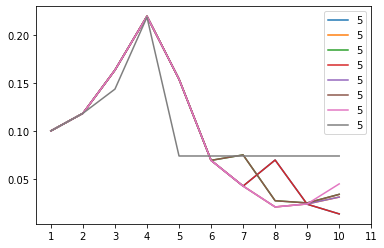

In [14]:
x = list(range(1, env.evo_epochs+1))
for entity in env.entities:
    plt.plot(x[:-1], entity.entity_history[:-1], label=entity.color+1)
plt.legend()
plt.xticks(x, x)
plt.show()